## **Importação das bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

## **Leitura e visualização dos dados**

In [3]:
libertadores = pd.read_csv('./dados/Libertadores_Matches.csv', sep=',', encoding='utf-8')
libertadores.head()

,datetime,home_team,away_team,home_goal,away_goal,season,stage
0,2013-02-12 20:15:00,Nacional (URU),Barcelona-EQU,2,2,2013.0,group stage
1,2013-02-13 22:00:00,Boca Juniors,Toluca,1,2,2013.0,group stage
2,2013-02-19 23:45:00,Toluca,Nacional (URU),2,3,2013.0,group stage
3,2013-02-27 19:45:00,Barcelona-EQU,Boca Juniors,1,2,2013.0,group stage
4,2013-03-07 00:15:00,Toluca,Barcelona-EQU,1,1,2013.0,group stage


In [4]:
libertadores.tail()

,datetime,home_team,away_team,home_goal,away_goal,season,stage
1250,2022-08-30 21:30:00,Athletico,Palmeiras,1,0,2022.0,semifinals
1251,2022-09-06 21:30:00,Palmeiras,Athletico,2,2,2022.0,semifinals
1252,2022-08-31 21:30:00,Vélez Sarsfield,Flamengo,0,4,2022.0,semifinals
1253,2022-09-07 21:30:00,Flamengo,Vélez Sarsfield,2,1,2022.0,semifinals
1254,NaN,Flamengo,Athletico,-,-,NaN,final


## **Organização e Tratamento dos dados**

In [5]:
libertadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   1254 non-null   object 
 1   home_team  1255 non-null   object 
 2   away_team  1255 non-null   object 
 3   home_goal  1255 non-null   object 
 4   away_goal  1255 non-null   object 
 5   season     1254 non-null   float64
 6   stage      1255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 68.8+ KB


### **Inserção do resultado da final de 2022**

In [6]:
# Visualização dos valores atuais
libertadores.iloc[-1, :]

datetime           NaN
home_team     Flamengo
away_team    Athletico
home_goal            -
away_goal            -
season             NaN
stage            final
Name: 1254, dtype: object

In [7]:
libertadores.iloc[-1, :] = ['2022-10-29 17:00:00', 'Flamengo', 'Athletico', 1, 0, 2022, 'final']
libertadores.iloc[-1, :]

datetime     2022-10-29 17:00:00
home_team               Flamengo
away_team              Athletico
home_goal                      1
away_goal                      0
season                    2022.0
stage                      final
Name: 1254, dtype: object

### **Renomeação das colunas**

In [8]:
libertadores.columns

Index(['datetime', 'home_team', 'away_team', 'home_goal', 'away_goal',
       'season', 'stage'],
      dtype='object')

In [9]:
libertadores.rename(columns={'datetime': 'data_jogo',
                            'home_team':'time_casa',
                            'away_team':'time_fora',
                            'home_goal':'gols_casa',
                            'away_goal': 'gols_fora',
                            'season': 'temporada',
                            'stage': 'fase'}, inplace=True)

libertadores.columns

Index(['data_jogo', 'time_casa', 'time_fora', 'gols_casa', 'gols_fora',
       'temporada', 'fase'],
      dtype='object')

### **Valores Missing (NaN)**

In [10]:
# Contagem dos valores NaN
libertadores.isnull().sum()

data_jogo    0
time_casa    0
time_fora    0
gols_casa    0
gols_fora    0
temporada    0
fase         0
dtype: int64

In [11]:
# Verificando se contém algum registro em que o valor de data_jogo não seja uma data e não está como NaN
libertadores.loc[libertadores['data_jogo'].apply(lambda x: not isinstance(x, pd.Timestamp))]

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,fase
0,2013-02-12 20:15:00,Nacional (URU),Barcelona-EQU,2,2,2013.0,group stage
1,2013-02-13 22:00:00,Boca Juniors,Toluca,1,2,2013.0,group stage
2,2013-02-19 23:45:00,Toluca,Nacional (URU),2,3,2013.0,group stage
3,2013-02-27 19:45:00,Barcelona-EQU,Boca Juniors,1,2,2013.0,group stage
4,2013-03-07 00:15:00,Toluca,Barcelona-EQU,1,1,2013.0,group stage
...,...,...,...,...,...,...,...
1250,2022-08-30 21:30:00,Athletico,Palmeiras,1,0,2022.0,semifinals
1251,2022-09-06 21:30:00,Palmeiras,Athletico,2,2,2022.0,semifinals
1252,2022-08-31 21:30:00,Vélez Sarsfield,Flamengo,0,4,2022.0,semifinals
1253,2022-09-07 21:30:00,Flamengo,Vélez Sarsfield,2,1,2022.0,semifinals


In [12]:
# Verificando se há valores faltantes que não estão como NaN;
libertadores['gols_casa'].unique()

# Nesse caso, há valores NaN que estão como a string '-'

array(['2', '1', '0', '4', '3', '5', '-', '6', '8', '7', 1], dtype=object)

In [13]:
libertadores['gols_fora'].unique()

array(['2', '3', '1', '0', '5', '4', '-', '7', '6', 0], dtype=object)

In [14]:
aux = libertadores.loc[libertadores['gols_casa'] == '-']
aux

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,fase
363,2015-05-14 21:00:00,Boca Juniors,River Plate,-,-,2015.0,round of 16


In [15]:
# Alterando o placar do jogo para o correto
libertadores['gols_casa'][aux.index] = 0
libertadores['gols_fora'][aux.index] = 3

libertadores.iloc[aux.index]

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,fase
363,2015-05-14 21:00:00,Boca Juniors,River Plate,0,3,2015.0,round of 16


In [16]:
libertadores['temporada'].unique()

array([2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
       2022.])

### **Tipagem dos dados**

In [17]:
libertadores.dtypes

data_jogo     object
time_casa     object
time_fora     object
gols_casa     object
gols_fora     object
temporada    float64
fase          object
dtype: object

In [18]:
libertadores['data_jogo'] = pd.to_datetime(libertadores['data_jogo'])
libertadores['gols_casa'] = libertadores['gols_casa'].astype(np.int64)
libertadores['gols_fora'] = libertadores['gols_fora'].astype(np.int64)
libertadores['temporada'] = libertadores['temporada'].astype(np.int64)

libertadores.dtypes

data_jogo    datetime64[ns]
time_casa            object
time_fora            object
gols_casa             int64
gols_fora             int64
temporada             int64
fase                 object
dtype: object

### **Tradução das fases**

In [19]:
libertadores['fase'].unique()

array(['group stage', 'final', 'semifinals', 'quarterfinals',
       'round of 16'], dtype=object)

In [20]:
libertadores['fase'] = libertadores['fase'].replace({'group stage': 'fase de grupos',
                                                     'round of 16': 'oitavas de final',
                                                     'quartesfinals': 'quartas de final',
                                                     'semifinals': 'semifinal'})

libertadores['fase'].unique()

array(['fase de grupos', 'final', 'semifinal', 'quarterfinals',
       'oitavas de final'], dtype=object)

### **Adição da final de 2021**

In [21]:
libertadores.loc[libertadores['fase'] == 'final'].loc[libertadores['temporada'] == 2021]

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,fase


In [22]:
final_2021 = {
    'temporada': 2021,
    'data_jogo': pd.to_datetime('2021-11-27 17:00:00'),
    'fase': 'final',
    'time_casa': 'Palmeiras',
    'time_fora': 'Flamengo',
    'gols_casa': 2,
    'gols_fora': 1
}

# Use o método iloc para inserir o novo registro no índice anterior ao primeiro registro da temporada de 2022
indice_insercao = libertadores.loc[libertadores['temporada'] == 2022].index[0]
libertadores = pd.concat(
    [
        libertadores.iloc[:indice_insercao],
        pd.DataFrame(final_2021, index=[indice_insercao]),
        libertadores.iloc[indice_insercao:]
    ]
).reset_index(drop=True)

# O reset_index é usado para reorganizar os índices após a inserção

In [23]:
libertadores.loc[libertadores['fase'] == 'final'].loc[libertadores['temporada'] == 2021]

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,fase
1130,2021-11-27 17:00:00,Palmeiras,Flamengo,2,1,2021,final


### **Adição de colunas**

In [24]:
# Adiciona a coluna que apresenta o placar de cada jogo
libertadores['placar'] = libertadores['gols_casa'].astype(str) + '-' + libertadores['gols_fora'].astype(str)

In [25]:
# Armazena os gols da casa e do visitante em listas
gols_casa = [int(gols) for gols in libertadores['gols_casa']]
gols_visitante = [int(gols) for gols in libertadores['gols_fora']]

# Une os valores de gols_casa e gols_visitante de acordo com o índice
# de cada lista
placares = zip(gols_casa, gols_visitante)

# Lista vazia para armazenar os resultados
resultados = []

for placar in placares:
    # Se o time da casa fez mais gols que o visitante
    if placar[0] > placar[1]:
       resultados.append('Vitória Casa')
    # Se os dois times fizeram a mesma quantidade de gols
    elif placar[0] == placar[1]:
       resultados.append('Empate')
    # Se o time visitante fez mais gols que o time da casa
    else:
       resultados.append('Vitória Fora')

# Adiciona a coluna que apresenta o resultado de cada jogo
libertadores['resultado'] = resultados

In [26]:
libertadores.head()

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,fase,placar,resultado
0,2013-02-12 20:15:00,Nacional (URU),Barcelona-EQU,2,2,2013,fase de grupos,2-2,Empate
1,2013-02-13 22:00:00,Boca Juniors,Toluca,1,2,2013,fase de grupos,1-2,Vitória Fora
2,2013-02-19 23:45:00,Toluca,Nacional (URU),2,3,2013,fase de grupos,2-3,Vitória Fora
3,2013-02-27 19:45:00,Barcelona-EQU,Boca Juniors,1,2,2013,fase de grupos,1-2,Vitória Fora
4,2013-03-07 00:15:00,Toluca,Barcelona-EQU,1,1,2013,fase de grupos,1-1,Empate


### **Reordenação de colunas**

In [27]:
# Remove as colunas e armazena em uma variável em forma de Série
temporadas = libertadores.pop('temporada')
rodadas = libertadores.pop('fase')

# Insere as no DataFrame no índice desejado
libertadores.insert(0, 'temporada', temporadas)
libertadores.insert(2, 'fase', rodadas)

libertadores.head()

,temporada,data_jogo,fase,time_casa,time_fora,gols_casa,gols_fora,placar,resultado
0,2013,2013-02-12 20:15:00,fase de grupos,Nacional (URU),Barcelona-EQU,2,2,2-2,Empate
1,2013,2013-02-13 22:00:00,fase de grupos,Boca Juniors,Toluca,1,2,1-2,Vitória Fora
2,2013,2013-02-19 23:45:00,fase de grupos,Toluca,Nacional (URU),2,3,2-3,Vitória Fora
3,2013,2013-02-27 19:45:00,fase de grupos,Barcelona-EQU,Boca Juniors,1,2,1-2,Vitória Fora
4,2013,2013-03-07 00:15:00,fase de grupos,Toluca,Barcelona-EQU,1,1,1-1,Empate


## **Legenda**


**temporada**: Ano/temporada do campeonato em disputa

**data_jogo**: Data e horário em que o jogo foi realizado

**fase**: Fase do campeonato em disputa
   
**time_casa**: Time que jogou como mandante

**time_fora**: time que jogou como visitante

**gols_casa**: Gols do time mandante no jogo inteiro

**gols_fora**: Gols do time visitante no jogo inteiro

**placar**: Placar final do jogo disputado
   
**resultado**: Resultado final do jogo disputado


## **EXPLORAÇÃO**

### **Todos os times que participaram das edições de 2013 até 2022**

In [28]:
times = sorted(libertadores['time_casa'].unique())

In [29]:
print(f'{len(times)} times disputaram a Libertadores entre as temporadas de 2013 e 2022;')
print('\nOs times que participaram foram:\n')
for i, time in enumerate(times):
    print(f'{i+1}- {time}')

114 times disputaram a Libertadores entre as temporadas de 2013 e 2022;

Os times que participaram foram:

1- Alianza Lima
2- Always Ready
3- América de Cali
4- América-MG
5- Argentinos Juniors
6- Arsenal Sarandí
7- Athletico
8- Atlas
9- Atlético Nacional
10- Atlético Tucumán
11- Atlético-MG
12- Atlético-PR
13- Barcelona-EQU
14- Binacional
15- Boca Juniors
16- Bolívar
17- Botafogo
18- Caracas
19- Cerro Porteño
20- Chapecoense
21- Cobresal
22- Colo-Colo
23- Colón
24- Corinthians
25- Cruzeiro
26- Danubio
27- Defensa y Justicia
28- Defensor Sporting
29- Delfín
30- Delfín-EQU
31- Deportes Iquique
32- Deportes Tolima
33- Deportivo Anzoátegui
34- Deportivo Cali
35- Deportivo Lara
36- Deportivo Táchira
37- Emelec
38- Estudiantes
39- Estudiantes de Mérida
40- Flamengo
41- Fluminense
42- Fortaleza
43- Godoy Cruz
44- Grêmio
45- Guaraní (PAR)
46- Guaraní-PAR
47- Huachipato
48- Huracán
49- Ind. Santa Fe
50- Independiente
51- Independiente Del Valle
52- Independiente Medellín
53- Independiente Petr

### **Quantidade de temporadas disputadas por cada time**

In [30]:
# Conta a quantidade de jogos que cada time teve jogando em casa na fase de grupos
times_jogos_casa_fg = libertadores.loc[libertadores['fase'] == 'fase de grupos']['time_casa'].value_counts()

# Como em cada fase de grupos cada time tem 6 jogos, sendo 3 como mandante e 3 como visitante,
# então a cada 3 jogos é disputada 1 temporada
temporadas_disputadas = times_jogos_casa_fg // 3

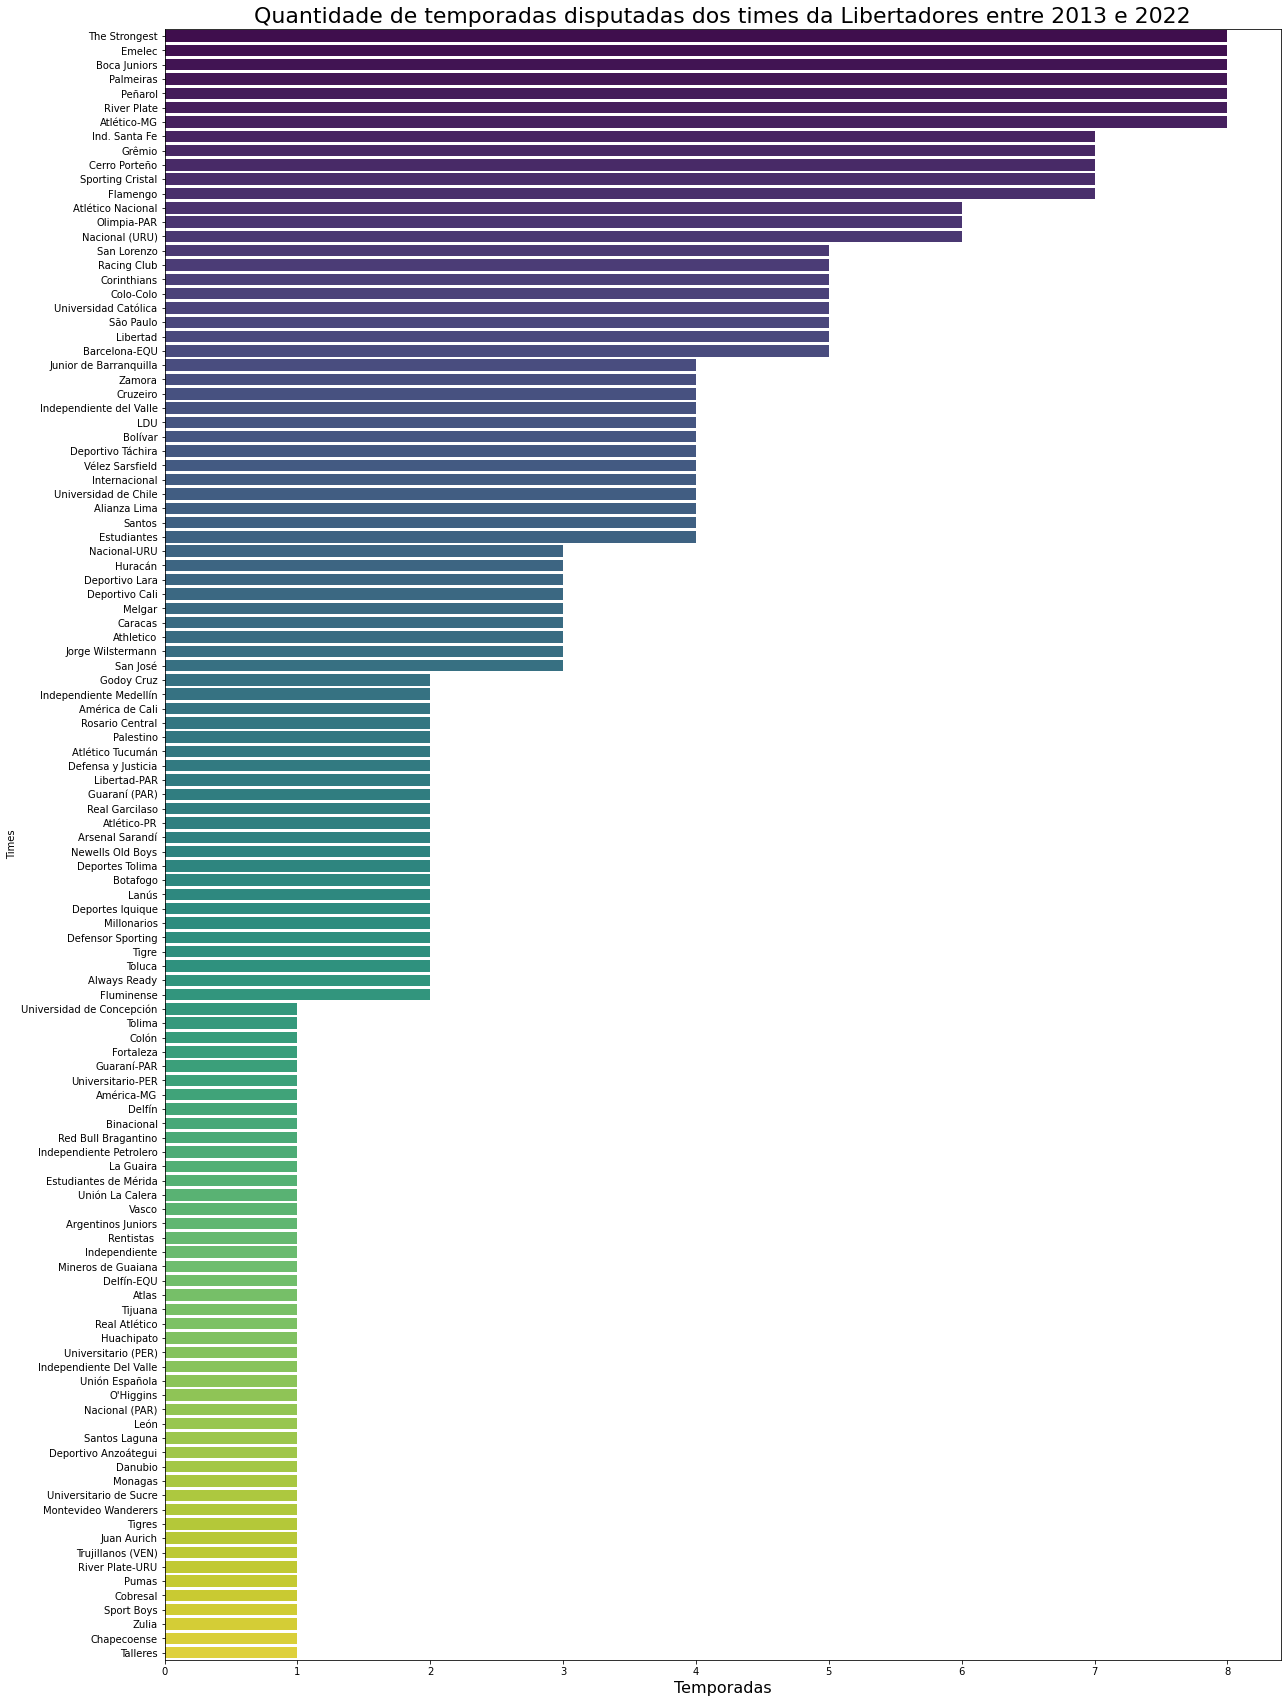

In [31]:
fig, ax = plt.subplots(figsize=(20, 30))
ax = sns.barplot(x=temporadas_disputadas.values,y=temporadas_disputadas.index, palette = 'viridis')
ax.set_title('Quantidade de temporadas disputadas dos times da Libertadores entre 2013 e 2022', fontsize=22)
ax.set_xlabel('Temporadas', fontsize=16)
ax.set_ylabel('Times')
plt.show()

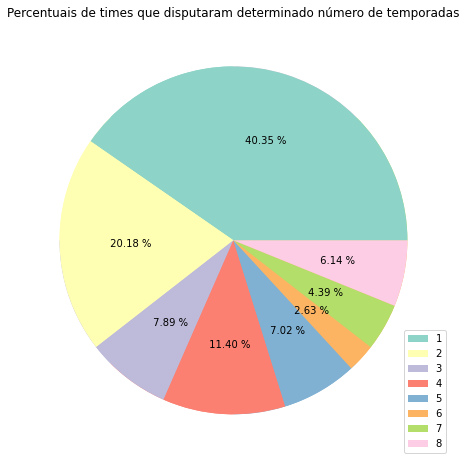

In [32]:
grafico_temporadas = temporadas_disputadas.value_counts().sort_index()

plt.figure(figsize=(8,8))

sizes=[0.7] * np.ones(8)
colors = sns.color_palette("Set3", 8)
patches, texts = plt.pie(sizes, startangle=90, colors=colors)
plt.legend(patches, grafico_temporadas.index, loc="best")

plt.pie(grafico_temporadas.values, autopct= '% .2f %%', colors=colors)
plt.title('Percentuais de times que disputaram determinado número de temporadas')

plt.show()

## **Times com mais partidas em mata-mata**

--> Mata-mata são todas as fases seguintes da fase de grupos (oitavas, quartas, semi e final)

In [33]:
mata_mata = libertadores.loc[libertadores['fase'] != 'fase de grupos']
partidas_mm = mata_mata['time_casa'].value_counts() + mata_mata['time_fora'].value_counts()
partidas_mm = partidas_mm.sort_values(ascending=False)
partidas_mm

River Plate           43
Boca Juniors          36
Palmeiras             34
Grêmio                30
Atlético-MG           28
                      ..
Huracán                2
Guaraní-PAR            2
Fortaleza              2
Defensa y Justicia     2
Argentinos Juniors     2
Length: 67, dtype: int64

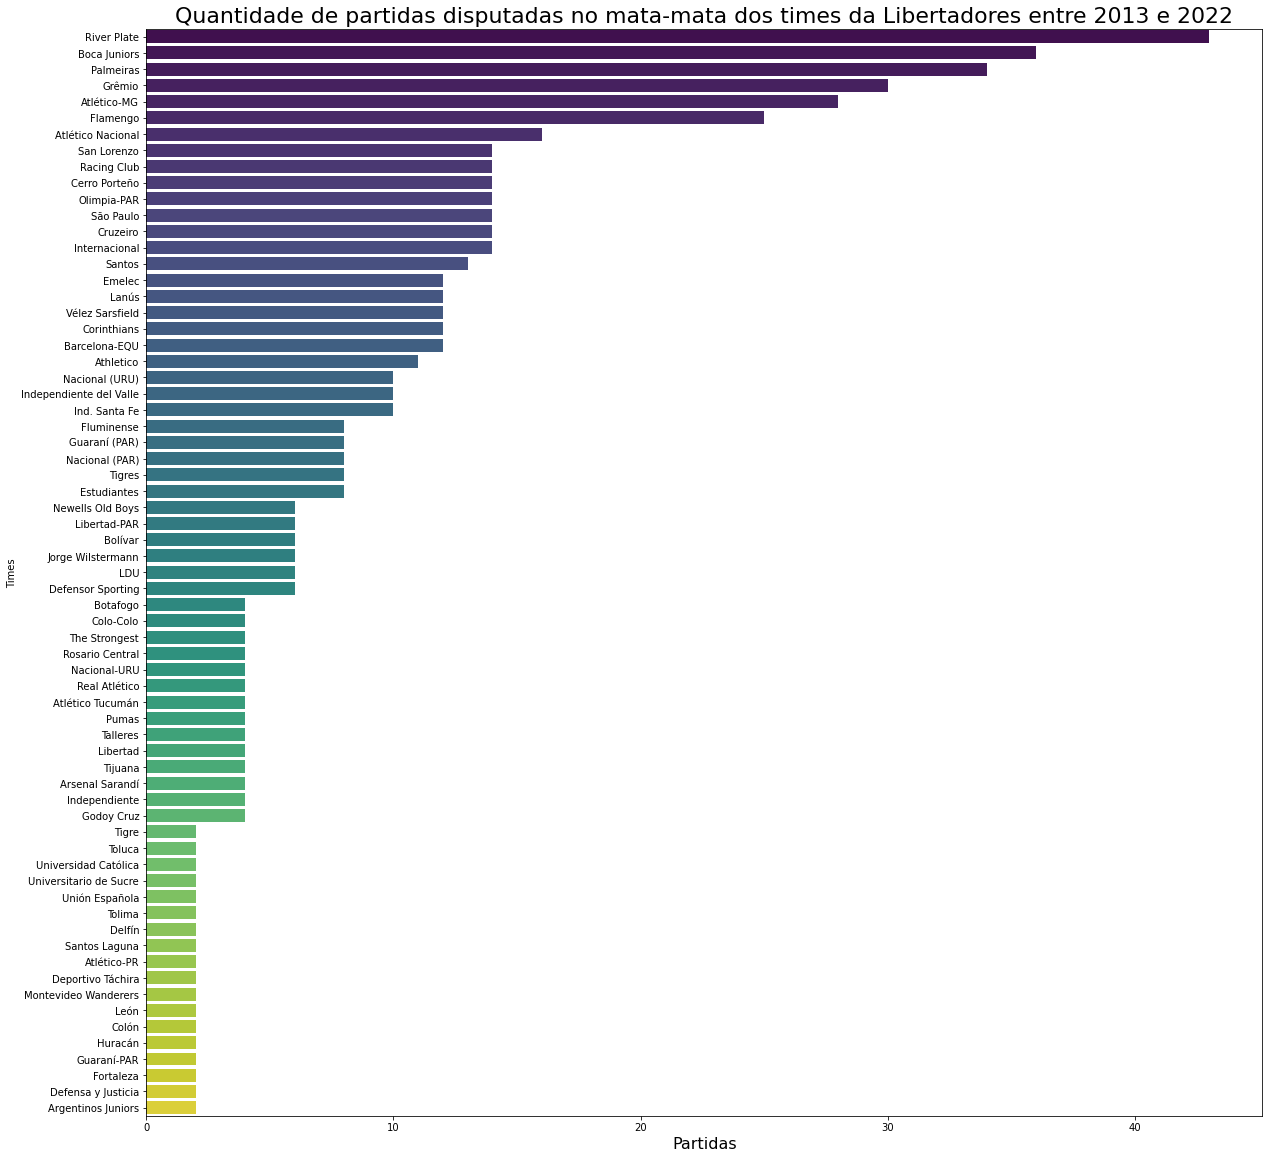

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.barplot(x=partidas_mm.values,y=partidas_mm.index, palette = 'viridis')
ax.set_title('Quantidade de partidas disputadas no mata-mata dos times da Libertadores entre 2013 e 2022', fontsize=22)
ax.set_xlabel('Partidas', fontsize=16)
ax.set_ylabel('Times')
plt.show()

### **Percentuais de vitórias e empates**

In [35]:
# Armazena na variável a quantidade de vitória casa, vitória fora e empate, ambos no formato de porcentagem
percentual_resultados = libertadores['resultado'].value_counts(normalize=True) * 100

print(f'Percentuais dos resultados dos times:\n')
print(f'Vitória do mandante: {percentual_resultados[0]:.2f}%')
print(f'Vitória do visitante: {percentual_resultados[1]:.2f}%')
print(f'Empate: {percentual_resultados[2]:.2f}%')

Percentuais dos resultados dos times:

Vitória do mandante: 51.04%
Vitória do visitante: 25.48%
Empate: 23.49%


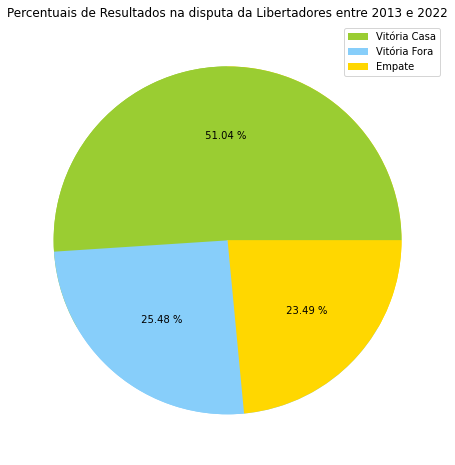

In [36]:
plt.figure(figsize=(8,8))

sizes=[0.7,0.7,0.7]
colors = ['yellowgreen', 'lightskyblue', 'gold']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, percentual_resultados.index, loc="best")

plt.pie(percentual_resultados.values, autopct= '% .2f %%', colors=colors)
plt.title('Percentuais de Resultados na disputa da Libertadores entre 2013 e 2022')

plt.show()

## **Criação de um novo DataFrame utilizando dados do existente**

In [37]:
libertadores_times = pd.DataFrame()

### **Total de jogos de cada time**

In [38]:
# Armazena na variável o número total de jogos de cada time em ordem decrescente
total_jogos_times = libertadores['time_casa'].value_counts() + libertadores['time_fora'].value_counts()

### **Total de vitórias, derrotas e empates em casa de cada time**

In [39]:
# Armazena nas variáveis o total de vitórias, derrotas e empates, respectivamente, de cada time jogando em casa
# Foi criada uma série com o valor 0 atribuído a todos os times para não prejudicar nas análises,
# pois poderia acontecer de algum time não ganhar nenhum jogo em casa, por exemplo, e ficar de fora da série final
total_vitorias_casa = pd.Series([0] * len(times), index=times)
total_vitorias_casa += libertadores.loc[libertadores['resultado'] == 'Vitória Casa']['time_casa'].value_counts()
total_vitorias_casa = total_vitorias_casa.fillna(0).astype(np.int64)

total_derrotas_casa = pd.Series([0] * len(times), index=times)
total_derrotas_casa += libertadores.loc[libertadores['resultado'] == 'Vitória Fora']['time_casa'].value_counts()
total_derrotas_casa = total_derrotas_casa.fillna(0).astype(np.int64)

total_empates_casa = pd.Series([0] * len(times), index=times)
total_empates_casa += libertadores.loc[libertadores['resultado'] == 'Empate']['time_casa'].value_counts()
total_empates_casa = total_empates_casa.fillna(0).astype(np.int64)

# Armazena nas variáveis o total de gols de cada time jogando em casa
total_gols_marcados_casa = libertadores.groupby(libertadores['time_casa'])['gols_casa'].sum()
total_gols_sofridos_casa = libertadores.groupby(libertadores['time_casa'])['gols_fora'].sum()

### **Total de vitórias, derrotas e empates jogando fora de cada time**

In [40]:
# Armazena nas variáveis o total de vitórias, derrotas e empates, respectivamente, de cada time jogando fora
total_vitorias_fora = pd.Series([0] * len(times), index=times)
total_vitorias_fora += libertadores.loc[libertadores['resultado'] == 'Vitória Fora']['time_fora'].value_counts()
total_vitorias_fora = total_vitorias_fora.fillna(0).astype(np.int64)

total_derrotas_fora = pd.Series([0] * len(times), index=times)
total_derrotas_fora += libertadores.loc[libertadores['resultado'] == 'Vitória Casa']['time_fora'].value_counts()
total_derrotas_fora = total_derrotas_fora.fillna(0).astype(np.int64)

total_empates_fora = pd.Series([0] * len(times), index=times)
total_empates_fora += libertadores.loc[libertadores['resultado'] == 'Empate']['time_fora'].value_counts()
total_empates_fora = total_empates_fora.fillna(0).astype(np.int64)

# Armazena nas variáveis o total de gols de cada time jogando em casa
total_gols_marcados_fora = libertadores.groupby(libertadores['time_fora'])['gols_fora'].sum()
total_gols_sofridos_fora = libertadores.groupby(libertadores['time_fora'])['gols_casa'].sum()

### **Total de gols acumulados de cada time**

In [41]:
# Total de gols acumulados de cada time durante todas as temporadas
total_gols_marcados = total_gols_marcados_casa + total_gols_marcados_fora
total_gols_sofridos = total_gols_sofridos_casa + total_gols_sofridos_fora

### **Aproveitamento (baseado em pontos) de cada time**

--> Aproveitamento é o resultado da divisão da quantidade de pontos adquiridos pela quantidade de pontos possíveis para aquele time;

--> Multiplicado por 100 pois está representado em porcentagem.

In [42]:
# Aproveitamento final (em %) cada time após todas as temporadas
aproveitamento_final_times = (total_vitorias_casa * 3 + total_vitorias_fora * 3 +
                              total_empates_casa + total_empates_fora) / (total_jogos_times * 3) * 100

### **Adição dos dados no DataFrame**

In [43]:
# Cria as colunas do DataFrame
libertadores_times['total_jogos'] = total_jogos_times
libertadores_times['qtde_temporadas_disputadas'] = libertadores_times['total_jogos'].apply(lambda x: x // 6)
libertadores_times['total_vitorias_casa'] = total_vitorias_casa
libertadores_times['total_empates_casa'] = total_empates_casa
libertadores_times['total_derrotas_casa'] = total_derrotas_casa
libertadores_times['total_gols_marcados_casa'] = total_gols_marcados_casa
libertadores_times['total_gols_sofridos_casa'] = total_gols_sofridos_casa
libertadores_times['total_vitorias_fora'] = total_vitorias_fora
libertadores_times['total_empates_fora'] = total_empates_fora
libertadores_times['total_derrotas_fora'] = total_derrotas_fora
libertadores_times['total_gols_marcados_fora'] = total_gols_marcados_fora
libertadores_times['total_gols_sofridos_fora'] = total_gols_sofridos_fora
libertadores_times['total_gols_marcados'] = total_gols_marcados
libertadores_times['total_gols_sofridos'] = total_gols_sofridos
libertadores_times['aproveitamento_final_%'] = round(aproveitamento_final_times, 2)

In [44]:
libertadores_times.head()

,total_jogos,qtde_temporadas_disputadas,total_vitorias_casa,total_empates_casa,total_derrotas_casa,total_gols_marcados_casa,total_gols_sofridos_casa,total_vitorias_fora,total_empates_fora,total_derrotas_fora,total_gols_marcados_fora,total_gols_sofridos_fora,total_gols_marcados,total_gols_sofridos,aproveitamento_final_%
Alianza Lima,24,4,0,4,8,6,18,0,0,12,5,34,11,52,5.56
Always Ready,12,2,3,1,2,9,5,0,2,4,4,15,13,20,33.33
América de Cali,12,2,1,2,3,5,9,1,2,3,7,9,12,18,27.78
América-MG,6,1,0,0,3,3,7,0,2,1,3,6,6,13,11.11
Argentinos Juniors,8,1,2,0,2,3,3,2,1,1,5,3,8,6,54.17


## **Gráficos baseados no novo DataFrame**

### **Gols**

In [45]:
lib_gols_marcados = libertadores_times['total_gols_marcados'].sort_values(ascending=False)
lib_gols_marcados

Palmeiras                  174
River Plate                163
Flamengo                   135
Atlético-MG                119
Boca Juniors               115
                          ... 
Binacional                   3
Independiente Petrolero      3
Vasco                        3
La Guaira                    2
Rentistas                    2
Name: total_gols_marcados, Length: 114, dtype: int64

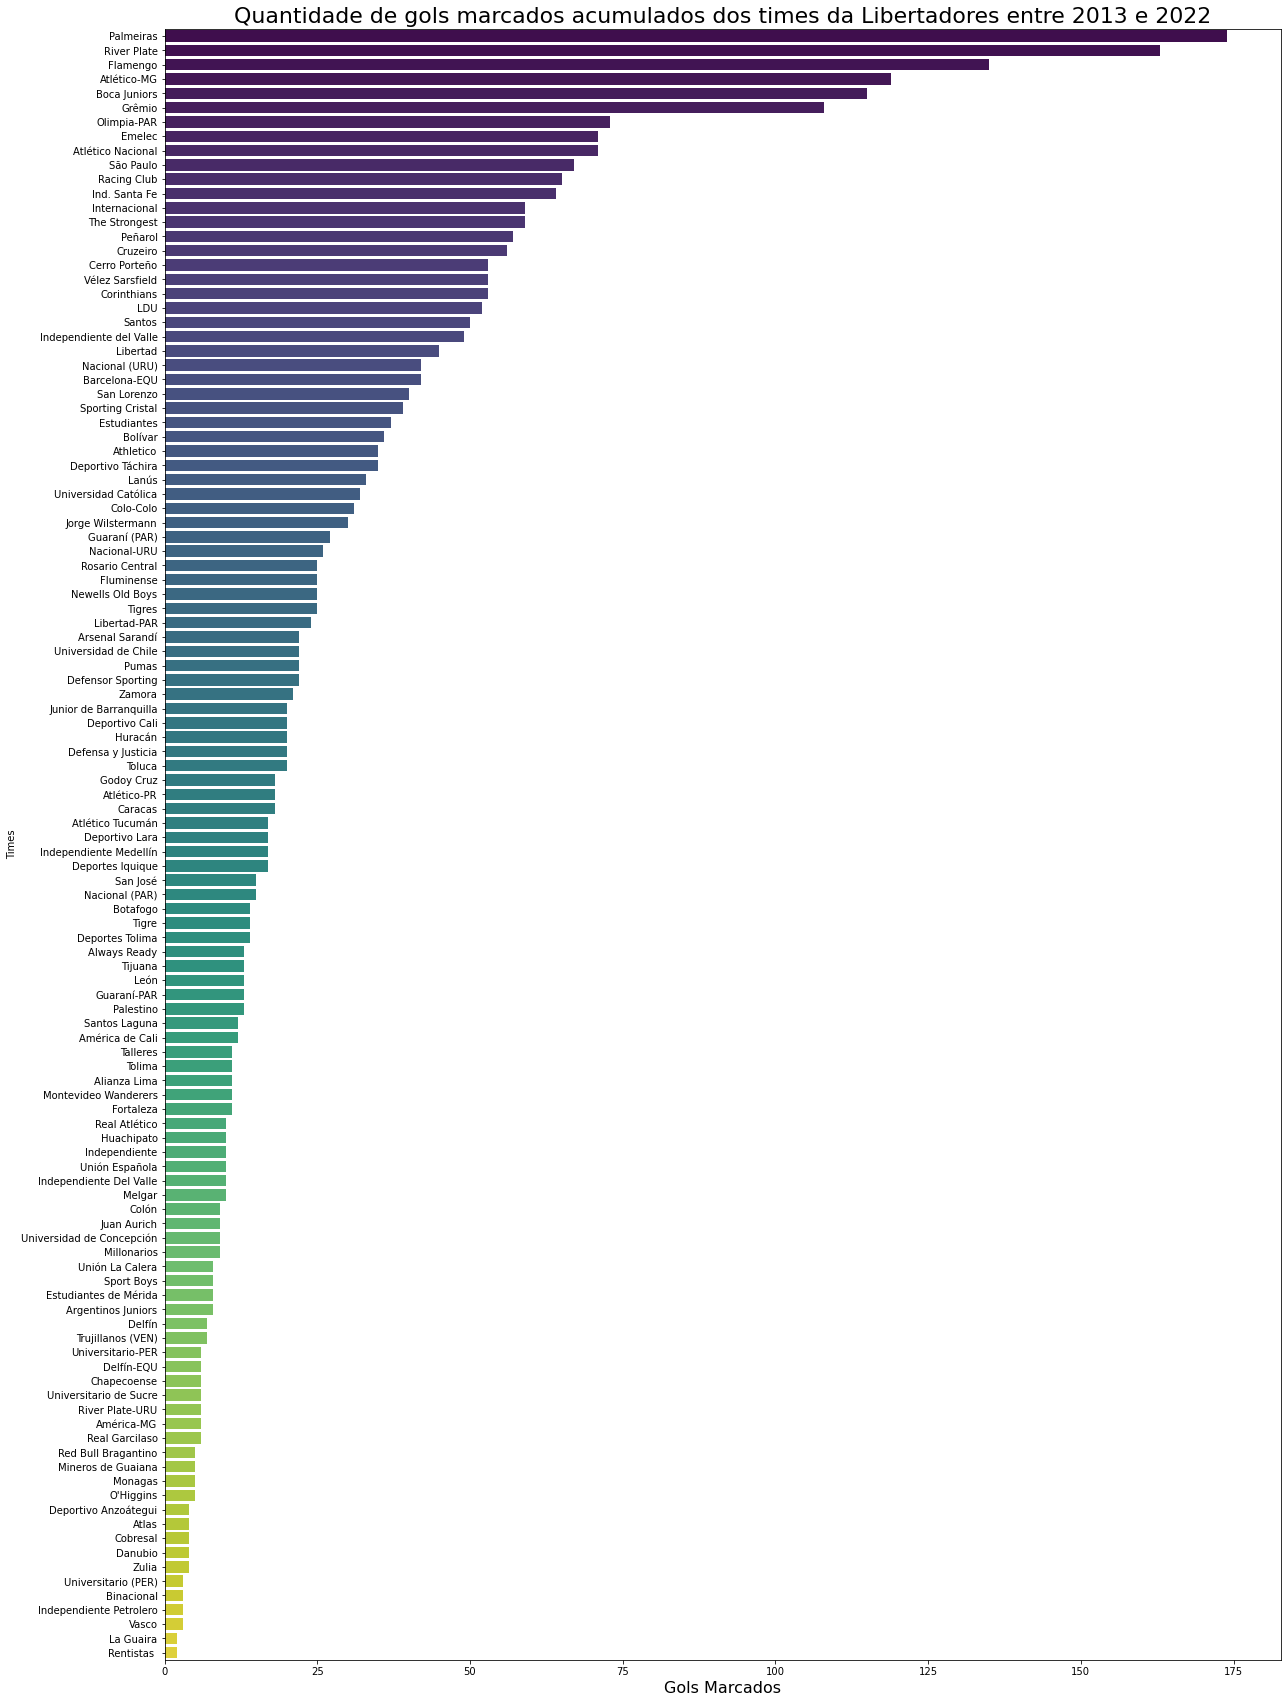

In [46]:
fig, ax = plt.subplots(figsize=(20, 30))
ax = sns.barplot(x=lib_gols_marcados.values,y=lib_gols_marcados.index, palette = 'viridis')
ax.set_title('Quantidade de gols marcados acumulados dos times da Libertadores entre 2013 e 2022', fontsize=22)
ax.set_xlabel('Gols Marcados', fontsize=16)
ax.set_ylabel('Times')
plt.show()

In [47]:
lib_gols_sofridos = libertadores_times['total_gols_sofridos'].sort_values(ascending=False)
lib_gols_sofridos

The Strongest             82
River Plate               81
Cerro Porteño             74
Emelec                    74
Sporting Cristal          74
                          ..
Huachipato                 8
Independiente              7
Universitario de Sucre     6
Argentinos Juniors         6
O'Higgins                  5
Name: total_gols_sofridos, Length: 114, dtype: int64

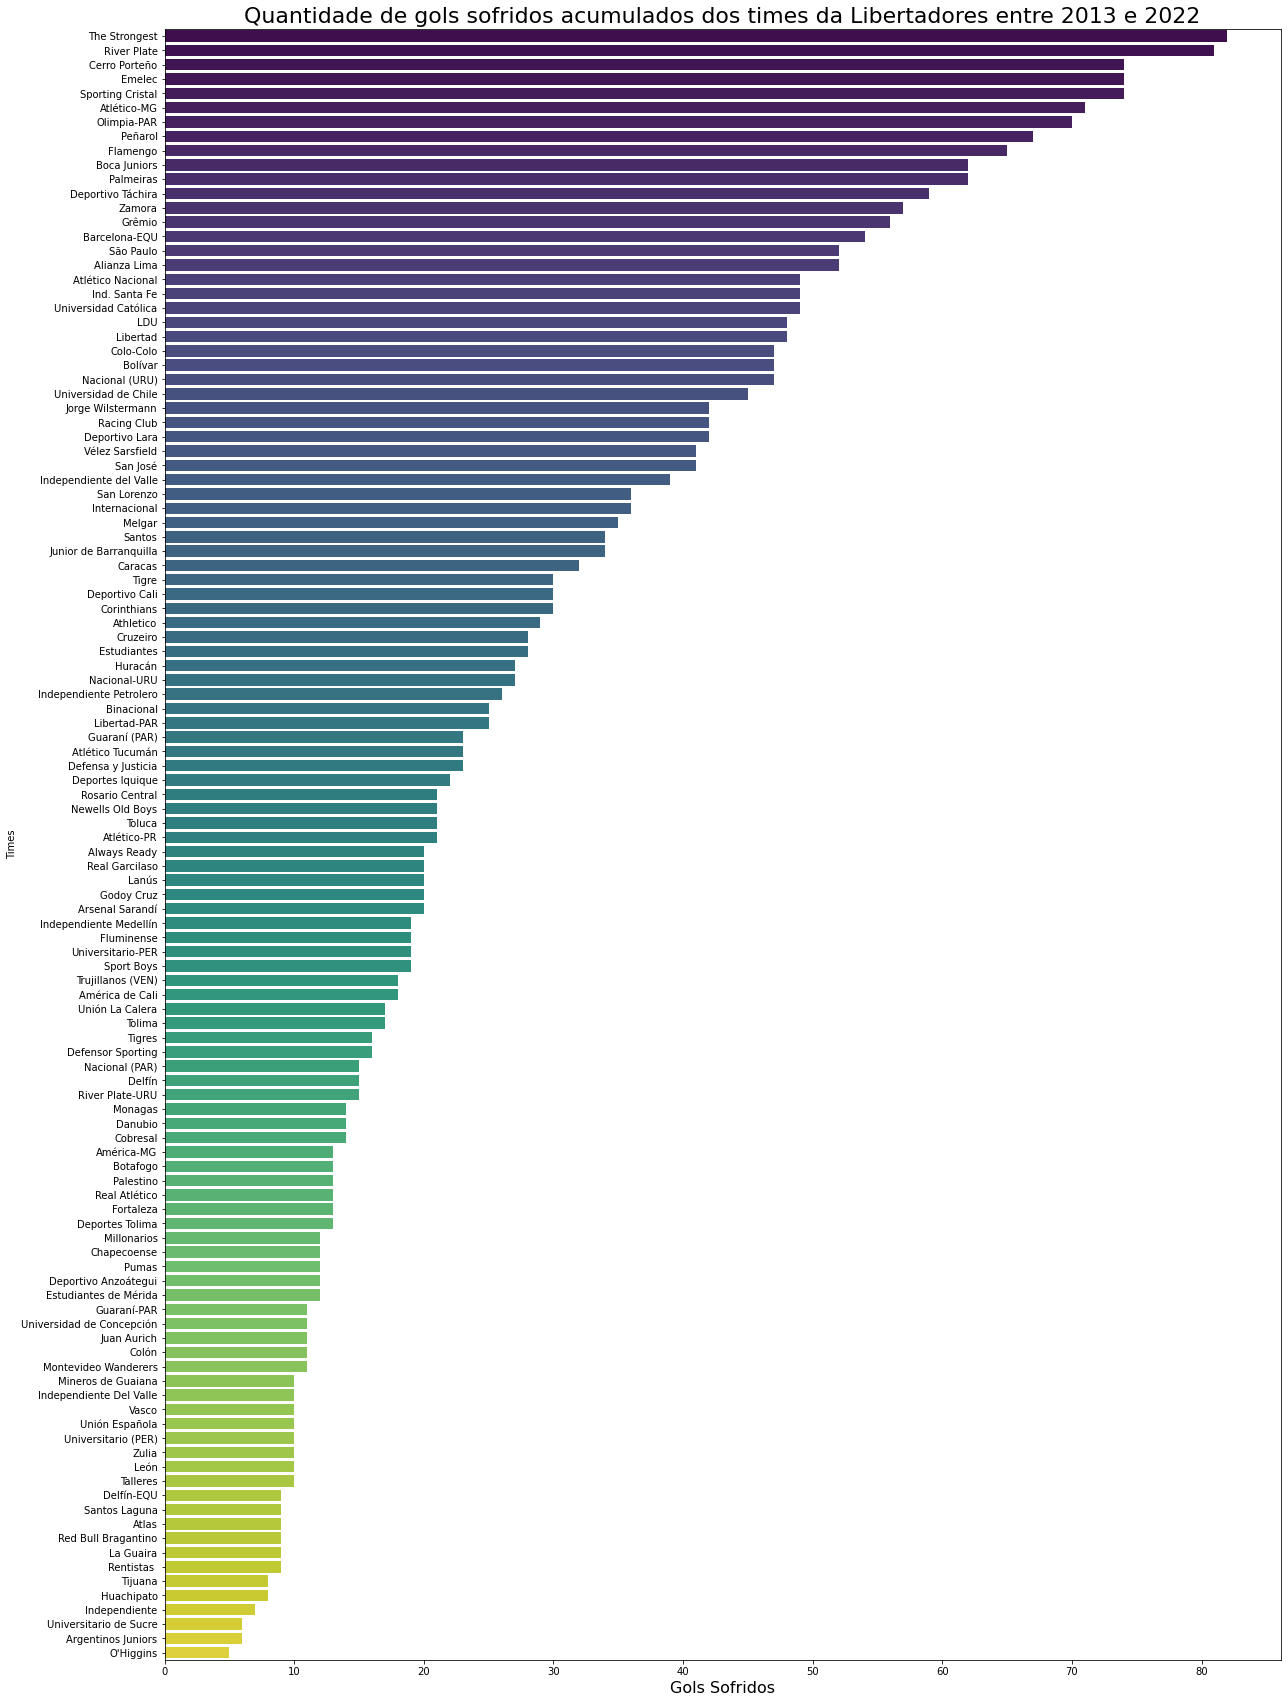

In [48]:
fig, ax = plt.subplots(figsize=(20, 30))
ax = sns.barplot(x=lib_gols_sofridos.values,y=lib_gols_sofridos.index, palette = 'viridis')
ax.set_title('Quantidade de gols sofridos acumulados dos times da Libertadores entre 2013 e 2022', fontsize=22)
ax.set_xlabel('Gols Sofridos', fontsize=16)
ax.set_ylabel('Times')
plt.show()

### **Aproveitamentos**

In [49]:
lib_aproveitamentos = libertadores_times['aproveitamento_final_%'].sort_values(ascending=False)
lib_aproveitamentos

Pumas                      70.00
Palmeiras                  69.51
Flamengo                   68.16
Tijuana                    63.33
Grêmio                     62.50
                           ...  
Unión La Calera            11.11
América-MG                 11.11
Universitario (PER)         5.56
Independiente Petrolero     5.56
Alianza Lima                5.56
Name: aproveitamento_final_%, Length: 114, dtype: float64

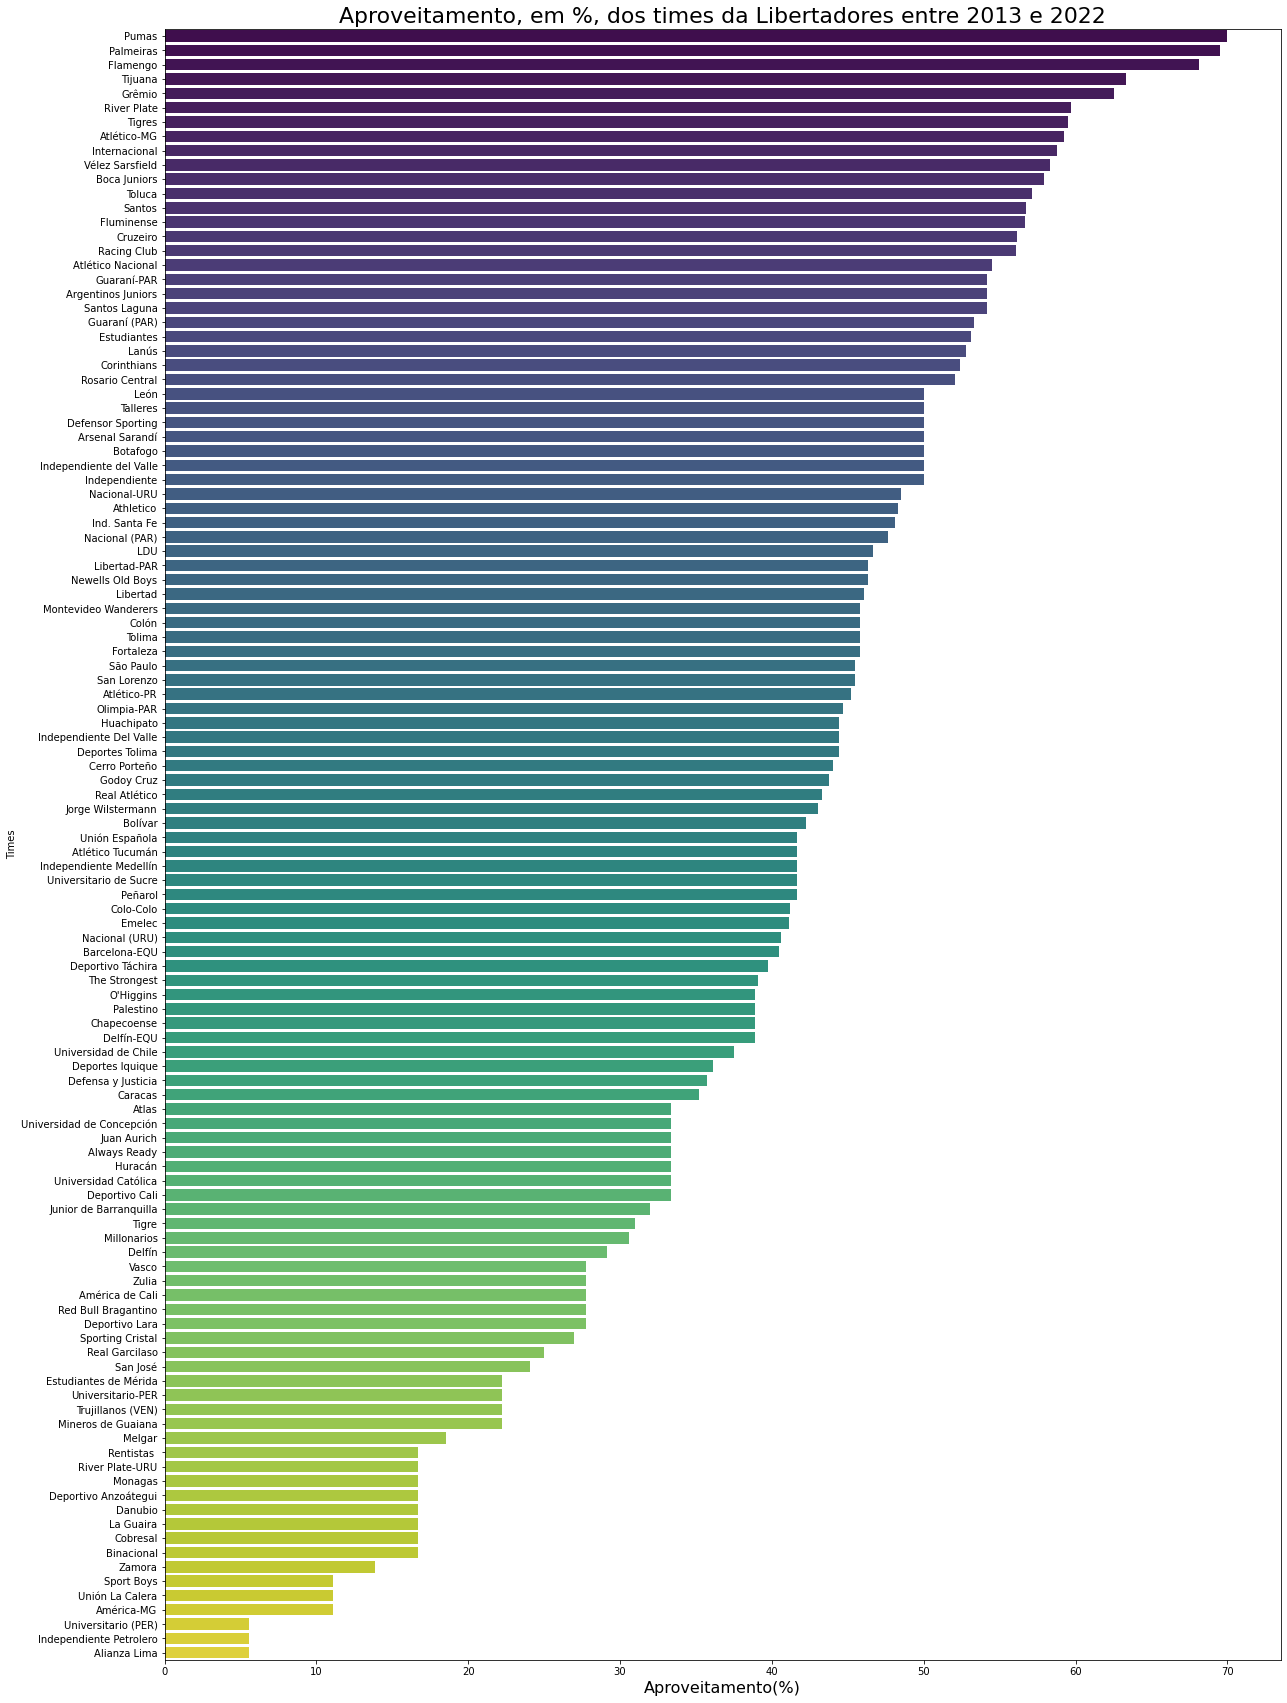

In [50]:
fig, ax = plt.subplots(figsize=(20, 30))
ax = sns.barplot(x=lib_aproveitamentos.values,y=lib_aproveitamentos.index, palette = 'viridis')
ax.set_title('Aproveitamento, em %, dos times da Libertadores entre 2013 e 2022', fontsize=22)
ax.set_xlabel('Aproveitamento(%)', fontsize=16)
ax.set_ylabel('Times')
plt.show()

## **Exportação dos DataFrames**

In [51]:
libertadores.to_csv('./dados/libertadores.csv', sep=';', encoding='utf-8', index=False)
libertadores_times.to_csv('./dados/libertadores_times.csv', sep=';', encoding='utf-8', index=False)

# **CONCLUSÕES**

- 114 times disputaram a Libertadores no período entre 2013 e 2022;
- Nenhum time esteve presente em todas as temporadas nesse período;
- 7 times estiveram presentes em 8 temporadas durante esse período;
- O time que mais disputou partidas de mata-mata foi o River Plate (43);
- O percentual de vitórias jogando em casa é de 51.04%, dando a entender que o mando de campo influencia significativamente o resultado do jogo;
- O time que mais marcou gols foi o Palmeiras (174) e o que mais sofreu foi o The Strongest (82);
- O time com o melhor aproveitamento foi o Pumas (70%), porém disputou apenas 1 temporada. Dos times que mais disputaram (8 temporadas), o melhor aproveitamento foi o do Palmeiras (69.51%);
- Os times com os piores aproveitamentos foram o Universitario (PER),Independiente Petrolero e Alianza Lima (5.56% cada).